# <p style="color:#C70039; text-align:center;">Homework 2.</p>


#### <p style="color:#515a5a;">In this jupyter notebook you will find the solutions requested using python code for Homework 2 of the course Introduction to Global Geophysics.</p>


### <p style="color:#C70039; text-align:center;">Section 4, literal c) </p>

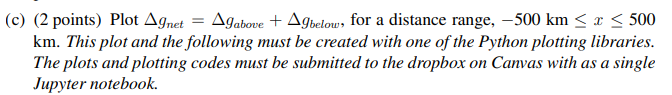

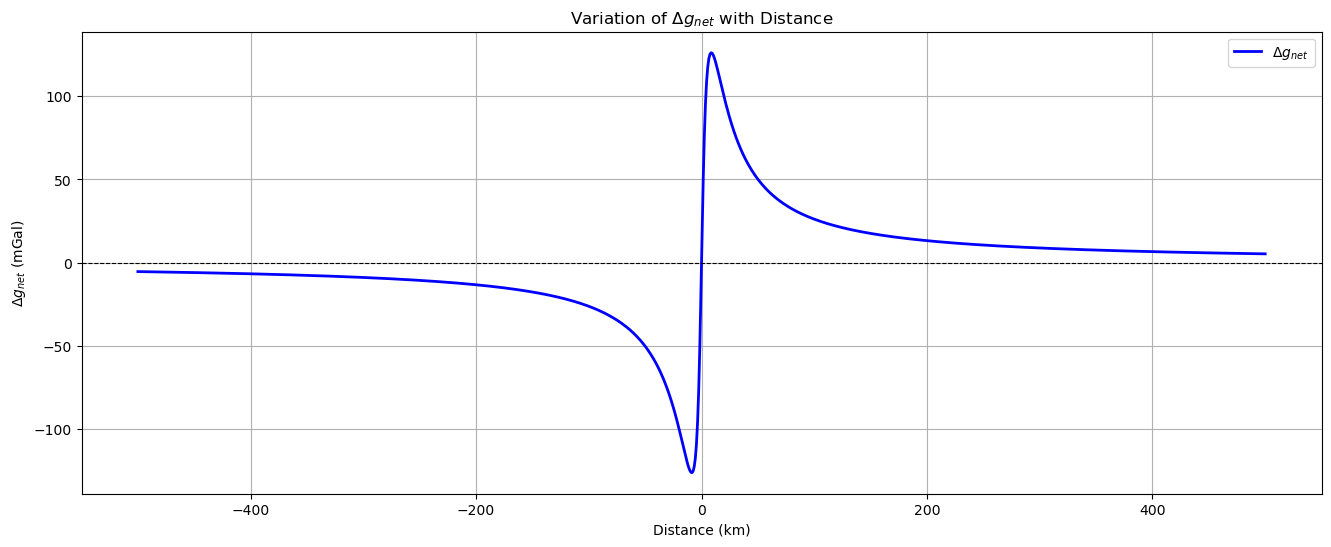

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.674e-11  # Gravitational constant (m³/kg/s²)
rho_c = 2700   # Crust density (kg/m³)
rho_w = 1030   # Water density (kg/m³)
rho_m = 3300   # Mantle density (kg/m³)
H = 30e3       # Total crust thickness (m)
t = 7.93e3     # Crust thickness over the seafloor (m)

# Range of distances in meters
x = np.linspace(-500e3, 500e3, 1000)  

# Gravity anomaly for the upper layer ("above")
h = t  # Thickness of the upper layer
delta_g_above = 2 * G * (rho_c - rho_w) * h * (np.pi / 2 + np.arctan(x / (h / 2)))

# Gravity anomaly for the lower layer ("below")
h_below = H - t  # Thickness of the lower layer
delta_g_below = 2 * G * (rho_c - rho_m) * h_below * (np.pi / 2 + np.arctan(x / (t + h_below / 2)))

# Net gravity anomaly
delta_g_net = delta_g_above + delta_g_below

# Convert to milligals (mGal = 10⁻⁵ m/s²)
delta_g_net *= 1e5  

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(x / 1e3, delta_g_net, label=r"$\Delta g_{net}$", color='b', linewidth=2)  # Convert x back to km for plot
plt.xlabel("Distance (km)")
plt.ylabel(r"$\Delta g_{net}$ (mGal)")
plt.title(r"Variation of $\Delta g_{net}$ with Distance")
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()



### <p style="color:#C70039; text-align:center;">Section 4, literal d), e) and f) </p>

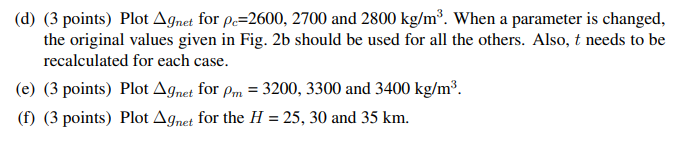

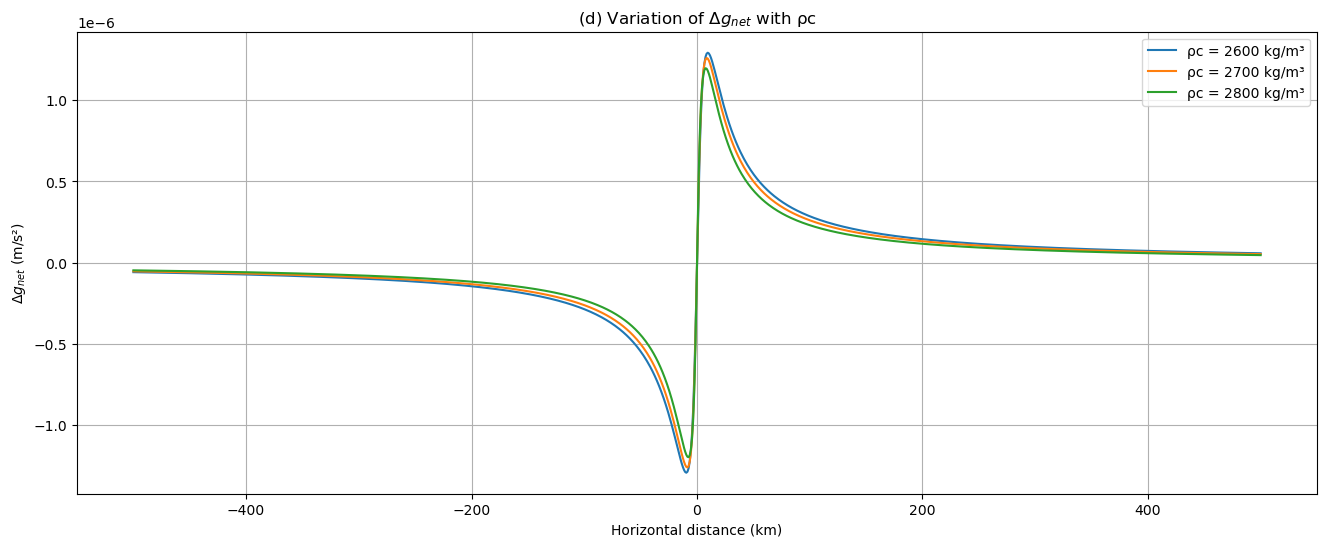

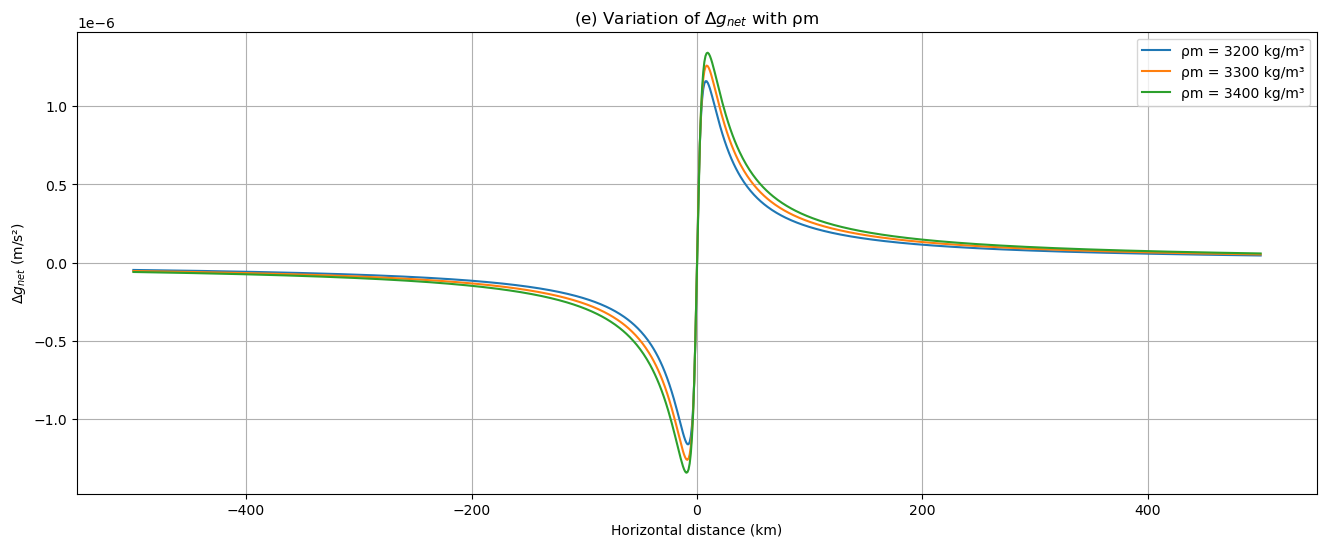

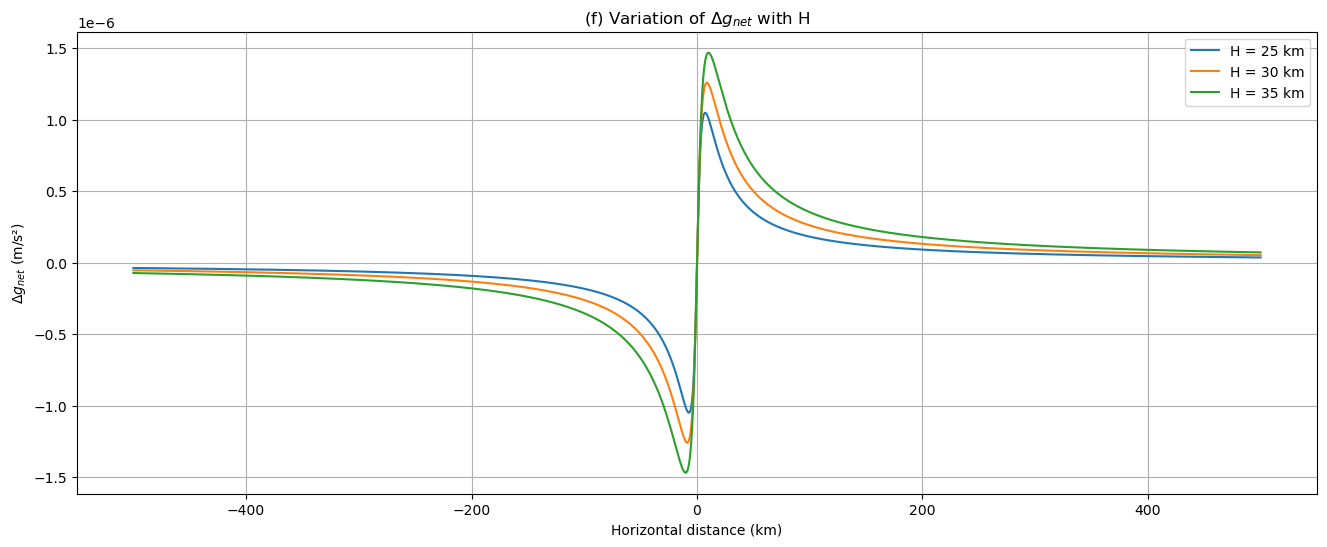

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_t(rho_c, rho_m, rho_w, H):
    return ((rho_c - rho_m) * H) / (rho_w - rho_m)

def gravity_anomaly(x, rho_c, rho_m, rho_w, H, G=6.67e-11):
    t = calculate_t(rho_c, rho_m, rho_w, H)
    
    g_above = 2 * G * (rho_c - rho_w) * t * (np.pi/2 + np.arctan(x / (t / 2)))
    g_below = 2 * G * (rho_c - rho_m) * (H - t) * (np.pi/2 + np.arctan(x / (t + (H - t) / 2)))
    
    return g_above + g_below

x = np.linspace(-500, 500, 1000)  # Horizontal distance
H = 30  # Crust thickness (km)
rho_w = 1030  # Water density (kg/m³)

# Parameters for section (d)
rho_c_values = [2600, 2700, 2800]
plt.figure(figsize=(16, 6))
for rho_c in rho_c_values:
    g_net = gravity_anomaly(x, rho_c, 3300, rho_w, H)
    plt.plot(x, g_net, label=f'ρc = {rho_c} kg/m³')
plt.xlabel('Horizontal distance (km)')
plt.ylabel('$\Delta g_{net}$ (m/s²)')
plt.title('(d) Variation of $\Delta g_{net}$ with ρc')
plt.legend()
plt.grid()
plt.show()

# Parameters for section (e)
rho_m_values = [3200, 3300, 3400]
plt.figure(figsize=(16, 6))
for rho_m in rho_m_values:
    g_net = gravity_anomaly(x, 2700, rho_m, rho_w, H)
    plt.plot(x, g_net, label=f'ρm = {rho_m} kg/m³')
plt.xlabel('Horizontal distance (km)')
plt.ylabel('$\Delta g_{net}$ (m/s²)')
plt.title('(e) Variation of $\Delta g_{net}$ with ρm')
plt.legend()
plt.grid()
plt.show()

# Parameters for section (f)
H_values = [25, 30, 35]
plt.figure(figsize=(16, 6))
for H in H_values:
    g_net = gravity_anomaly(x, 2700, 3300, rho_w, H)
    plt.plot(x, g_net, label=f'H = {H} km')
plt.xlabel('Horizontal distance (km)')
plt.ylabel('$\Delta g_{net}$ (m/s²)')
plt.title('(f) Variation of $\Delta g_{net}$ with H')
plt.legend()
plt.grid()
plt.show()



### <p style="color:#C70039; text-align:center;">Section 5, literal a) </p>



#### <p style="color:#5b2c6f; text-align:center;"> The GOCE 

<p style="color:#515a5a;">Gravity Field and Steady-State Ocean Circulation Explorer satellite, operated by the European Space Agency (ESA), was designed to measure the Earth's gravitational field with great precision, study the shape of the geoid by measuring Earth's altitudes, sea-level changes, and terrestrial ice dynamics. Ceased operations in 2013 </p>

<p style="color:#515a5a;">It had a very low orbit, at about 250 km in altitude, because at that height, the gravitational field signals are stronger.</p>

<p style="color:#515a5a;">It also became the first seismometer in orbit when it detected sound waves from the Japan earthquake on March 11, 2011. A unique feature of this satellite is the absence of moving parts (common in others), which helps prevent gravity measurements from being influenced by the satellite's movements.

#### <p style="color:#5b2c6f; text-align:center;">GRACE 

<p style="color:#515a5a;">Is a space mission consisting of two twin satellites that measure variations in the Earth's gravitational field. GRACE operated until October 2017, and its successor, GRACE-FO (GRACE Follow-On), was launched in May 2018 to continue measurements. </p>

<p style="color:#515a5a;">GRACE measures the gravitational field by comparing the distance between the two spacecraft, as the irregularities in the gravitational field cause slight disturbances in each satellite's orbit. GRACE's precision is so unique that it can measure differences in micrometers, comparable to the thickness of a human hair. Using GPS technology, the satellites determine when and where to take measurements.

### <p style="color:#C70039; text-align:center;">Section 5, literal b) </p>


<p style="color:#515a5a; text-align:center;"> Gravity anomaly
<p style="color:#515a5a; text-align:center;"> 3 <= n <= 10

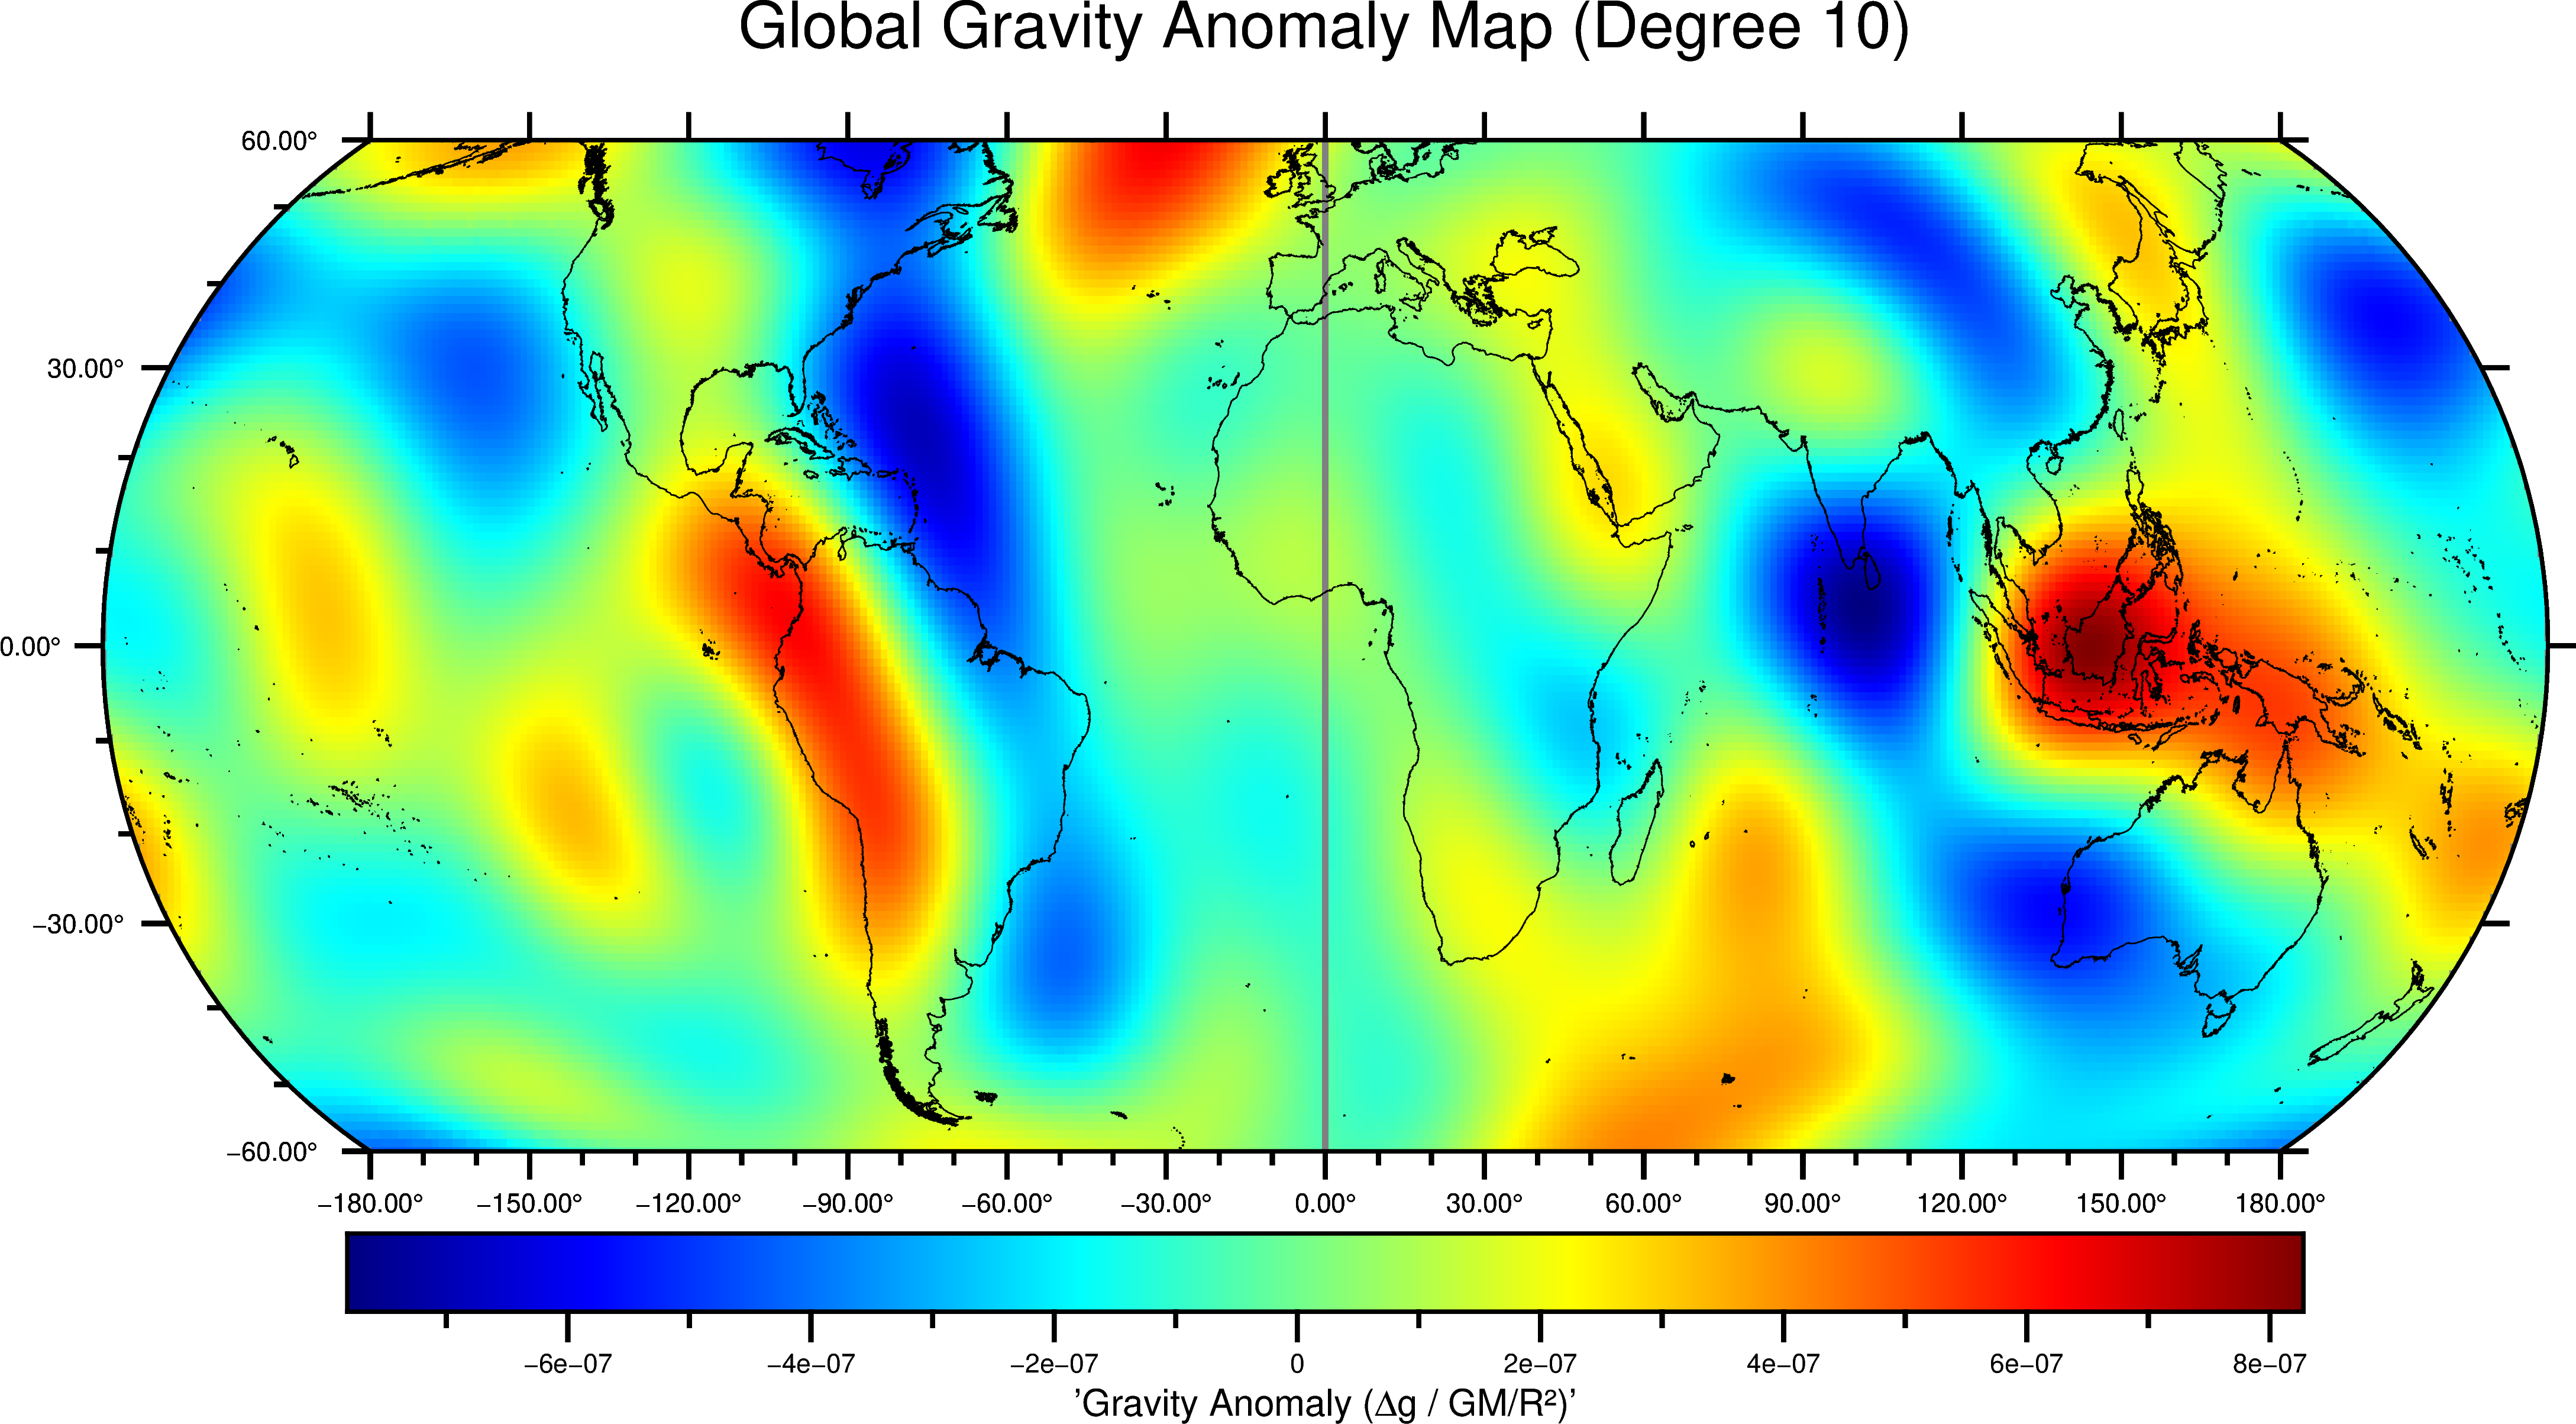

In [3]:
import numpy as np
import scipy.special as sp
import pygmt

#Constants
GM = 3.986004418e14  # Gravitational constant of the Earth (m^3/s^2)
R = 6378137.0  # Mean radius of the Earth (m)

#Empty matrices for the Stokes coefficients Cnm and Snm
Cnm = np.zeros((11, 11))  # Matrix for the Cnm coefficients
Snm = np.zeros((11, 11))  # Matrix for the Snm coefficients

#Path to the file 
file_path = 'C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/Homework2/WHU-SWPU-GOGR2022S.gfc'

#Read the coefficient file and store the values in the Cnm and Snm matrices
with open(file_path, 'r') as file:
    for line in file:
        parts = line.split()
        
        #Skip lines that do not contain valid coefficients
        if len(parts) < 5 or parts[0] != 'gfc':
            continue
        
        try:
            #Convert n and m to integers
            n, m = int(parts[1]), int(parts[2])
            
            #Ensure that n and m are within the valid range (0 <= m <= n < 11)
            if 0 <= n < 11 and 0 <= m <= n:
                #Assign the Cnm and Snm coefficients to the corresponding matrices
                Cnm[n, m] = float(parts[3])
                Snm[n, m] = float(parts[4])
        except ValueError:
            continue  #Ignore lines with incorrect values

#Define a grid of latitudes and longitudes for the gravity anomaly calculation
latitudes = np.linspace(-60, 60, 180)  # 180 points for latitudes
longitudes = np.linspace(-180, 180, 360)  # 360 points for longitudes

#Convert latitudes to colatitudes (90° - latitude) and longitudes to radians
theta = np.radians(90 - latitudes[:, np.newaxis])  # Colatitude in radians
phi = np.radians(longitudes)  # Longitude in radians

#Initialize the matrix to store the gravity anomaly
Delta_g = np.zeros((len(latitudes), len(longitudes)))

#Calculate the gravity anomaly using spherical harmonics
for n in range(3, 11):  # Start from n=3, excluding n=2
    for m in range(n + 1):
        Ynm = sp.sph_harm(m, n, phi, theta)  #Compute the spherical harmonics
        
        #Term corresponding to the Cnm and Snm coefficients
        term = np.real(Ynm) * Cnm[n, m] + np.imag(Ynm) * Snm[n, m]
        
        #Accumulate the gravity anomaly for this n and m
        Delta_g += (n - 1) * (R / R) ** n * term

#Normalization of the gravity anomaly by dividing by GM/R^2
Delta_g_normalized = Delta_g / (GM / R**2)

#Conversion to miligals
#Delta_g_mGal = Delta_g_normalized * 9.798e5
#Delta_g_corrected = np.roll(Delta_g_mGal, shift=180, axis=1)

Delta_g_corrected = np.roll(Delta_g_normalized, shift=180, axis=1)

#Create an interpolated grid from the adjusted data
grid = pygmt.xyz2grd(
    x=np.tile(longitudes, len(latitudes)),
    y=np.repeat(latitudes, len(longitudes)),
    z=Delta_g_corrected.ravel(),
    region=[-180, 180, -60, 60],  # Latitude and longitude region
    spacing="1d"  # 1-degree spacing
)

#Figure for the map using PyGMT
fig = pygmt.Figure()

#pygmt configuration
#pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(MAP_ANNOT_OFFSET="0.2c") 
pygmt.config(MAP_TICK_LENGTH="0.4c") 
pygmt.config(MAP_TICK_PEN="0.07c")
pygmt.config(FONT_TITLE="26p,Helvetica,black")
r=[-180, 180, -60, 60]
proj= "Kf35c"

#Basemap
fig.basemap(projection=proj, region=r, frame=True)

#Map with the adjusted gravity anomaly
pygmt.makecpt(cmap="jet", series=[float(Delta_g_corrected.min()), float(Delta_g_corrected.max())])
fig.grdimage(grid=grid, cmap=True)


#Add coastlines
fig.coast(shorelines="1/0.5p", resolution="h")

#Add a color bar
fig.colorbar(frame="af+l'Gravity Anomaly (Δg / GM/R²)'")

#Add title to the map
#fig.text(title="Global Gravity Anomaly Map (Degree 10)", x=0, y=90, font="26p,Helvetica-Bold", justify="TC")
fig.basemap(projection=proj, region=r, frame=["a", "WSne+t\"Global Gravity Anomaly Map (Degree 10)\""])


#Show the figure
fig.show()


### <p style="color:#C70039; text-align:center;">Section 5, literal c) </p>


<p style="color:#515a5a; text-align:center;"> Gravity anomaly
<p style="color:#515a5a; text-align:center;"> 3 <= n <= 60

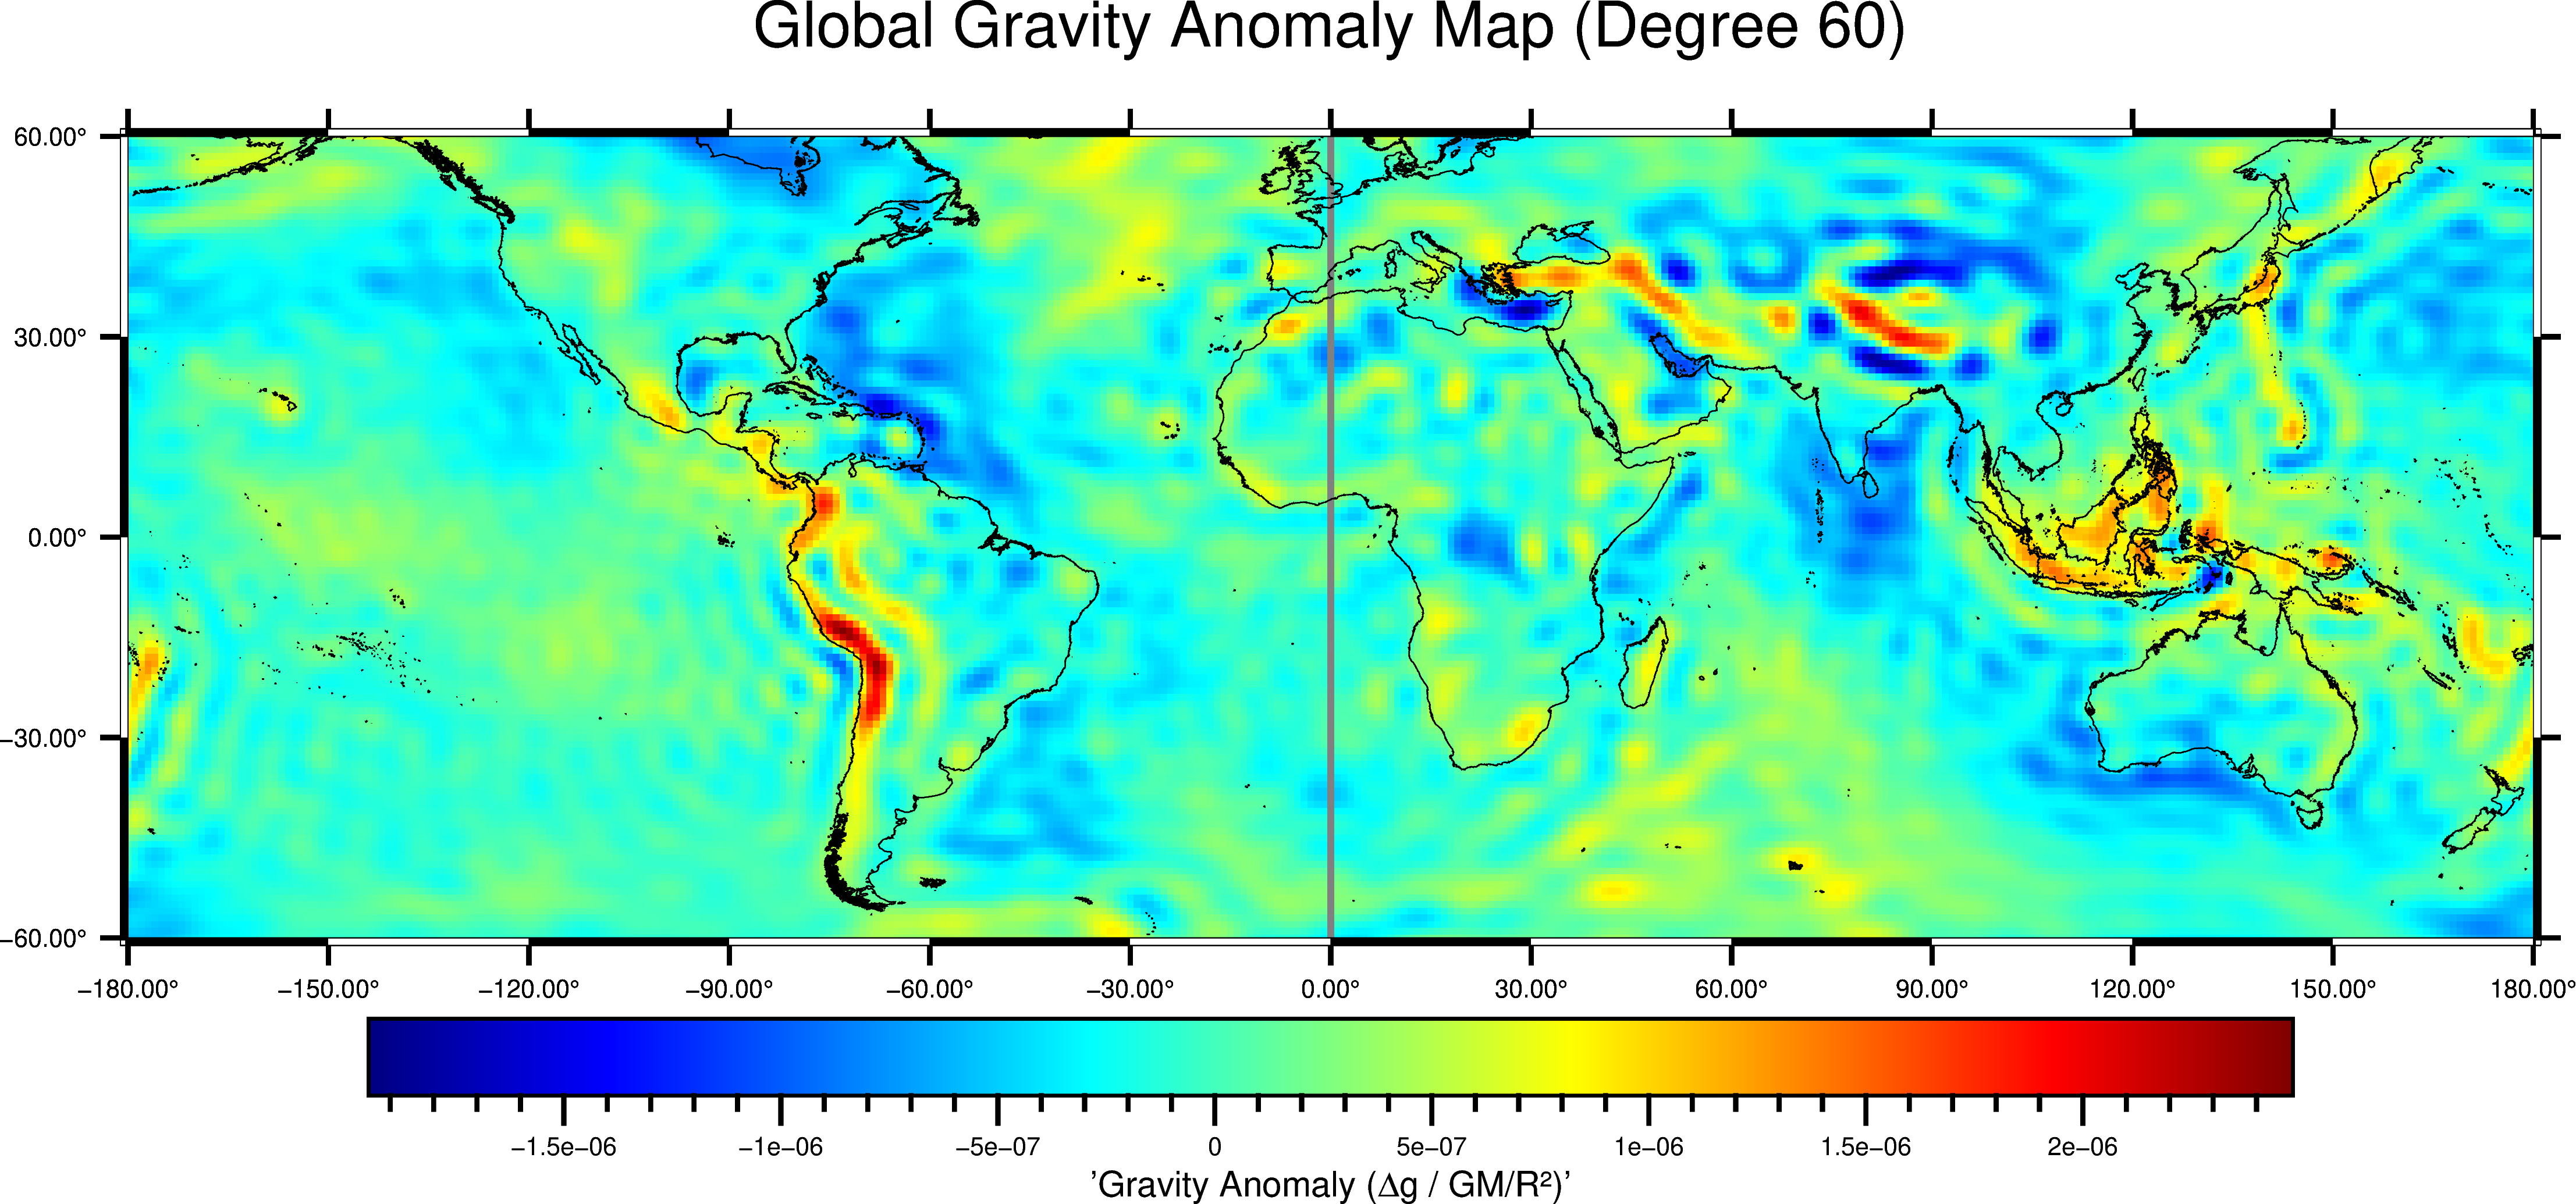

In [1]:
import numpy as np
import scipy.special as sp
import pygmt

#Constants
GM = 3.986004418e14  # Gravitational constant of the Earth (m^3/s^2)
R = 6378137.0  # Mean radius of the Earth (m)

#Empty matrices for the Stokes coefficients Cnm and Snm
Cnm = np.zeros((61, 61))  # Matrix for the Cnm coefficients
Snm = np.zeros((61, 61))  # Matrix for the Snm coefficients

#Path to the file 
file_path = 'C:/Users/Suzzy/OneDrive/Documentos/CERI/Courses/Global_Geophysics_8211/Homeworks/Homework2/WHU-SWPU-GOGR2022S.gfc'

#Read the coefficient file and store the values in the Cnm and Snm matrices
with open(file_path, 'r') as file:
    for line in file:
        parts = line.split()
        
        #Skip lines that do not contain valid coefficients
        if len(parts) < 5 or parts[0] != 'gfc':
            continue
        
        try:
            #Convert n and m to integers
            n, m = int(parts[1]), int(parts[2])
            
            #Ensure that n and m are within the valid range (0 <= m <= n < 11)
            if 0 <= n < 61 and 0 <= m <= n:
                #Assign the Cnm and Snm coefficients to the corresponding matrices
                Cnm[n, m] = float(parts[3])
                Snm[n, m] = float(parts[4])
        except ValueError:
            continue  #Ignore lines with incorrect values

#Define a grid of latitudes and longitudes for the gravity anomaly calculation
latitudes = np.linspace(-60, 60, 180)  # 180 points for latitudes
longitudes = np.linspace(-180, 180, 360)  # 360 points for longitudes

#Convert latitudes to colatitudes (90° - latitude) and longitudes to radians
theta = np.radians(90 - latitudes[:, np.newaxis])  # Colatitude in radians
phi = np.radians(longitudes)  # Longitude in radians

#Initialize the matrix to store the gravity anomaly
Delta_g = np.zeros((len(latitudes), len(longitudes)))

#Calculate the gravity anomaly using spherical harmonics
for n in range(3, 61):  # Start from n=3, excluding n=2
    for m in range(n + 1):
        Ynm = sp.sph_harm(m, n, phi, theta)  #Compute the spherical harmonics
        
        #Term corresponding to the Cnm and Snm coefficients
        term = np.real(Ynm) * Cnm[n, m] + np.imag(Ynm) * Snm[n, m]
        
        #Accumulate the gravity anomaly for this n and m
        Delta_g += (n - 1) * (R / R) ** n * term

#Normalization of the gravity anomaly by dividing by GM/R^2
Delta_g_normalized = Delta_g / (GM / R**2)

#Conversion to miligals
#Delta_g_mGal = Delta_g_normalized * 9.798e5
#Delta_g_corrected = np.roll(Delta_g_mGal, shift=180, axis=1)

Delta_g_corrected = np.roll(Delta_g_normalized, shift=180, axis=1)

#Create an interpolated grid from the adjusted data
grid = pygmt.xyz2grd(
    x=np.tile(longitudes, len(latitudes)),
    y=np.repeat(latitudes, len(longitudes)),
    z=Delta_g_corrected.ravel(),
    region=[-180, 180, -60, 60],  # Latitude and longitude region
    spacing="1d"  # 1-degree spacing
)

#Figure for the map using PyGMT
fig = pygmt.Figure()

#pygmt configuration
#pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(MAP_ANNOT_OFFSET="0.2c") 
pygmt.config(MAP_TICK_LENGTH="0.4c") 
pygmt.config(MAP_TICK_PEN="0.07c")
pygmt.config(FONT_TITLE="26p,Helvetica,black")
r=[-180, 180, -60, 60]
proj= "M35c"

#Basemap
fig.basemap(projection=proj, region=r, frame=True)

#Map with the adjusted gravity anomaly
pygmt.makecpt(cmap="jet", series=[float(Delta_g_corrected.min()), float(Delta_g_corrected.max())])
fig.grdimage(grid=grid, cmap=True)


#Add coastlines
fig.coast(shorelines="1/0.5p", resolution="h")

#Add a color bar
fig.colorbar(frame="af+l'Gravity Anomaly (Δg / GM/R²)'")

#Add title to the map
#fig.text(title="Global Gravity Anomaly Map (Degree 10)", x=0, y=90, font="26p,Helvetica-Bold", justify="TC")
fig.basemap(projection=proj, region=r, frame=["a", "WSne+t\"Global Gravity Anomaly Map (Degree 60)\""])


#Show the figure
fig.show()

<p style="color:#515a5a;">Both maps provide important information about Earth's gravity anomalies; however, they are displayed differently. The first map, corresponding to part (b), ranges from degree 3 to degree 10. Its low resolution only allows the observation of large-scale anomalies, such as those in the Iceland region, the Andes mountain range, and the islands near Malaysia—places that exhibit density anomalies due to mantle dynamics or topography, as in the case of Iceland and the Malaysia region.</p>

<p style="color:#515a5a;">In the second image, corresponding to part (c), which ranges from degree 3 to degree 60, we see a higher resolution. Local gravity variations are now more clearly visible, whereas in the previous image, only regional variations were distinctly observed. This image provides more detail, such as in the case of the Andes, where the gravity anomaly is now better defined.</p>

<p style="color:#515a5a;">Comparing these maps, we could assume that certain geological features in some areas may affect gravity values on a regional scale or influence those of nearby areas.

### <p style="color:#C70039; text-align:center;">Section 5, literal d) </p>


<p style="color:#515a5a; text-align:center;"> The geoid undulation from the EGM2008 model at Memphis from https://icgem.gfz-potsdam.de/calcgrid
 

<p style="color:#515a5a; text-align:center;">Map by https://icgem.gfz-potsdam.de/calcgrid

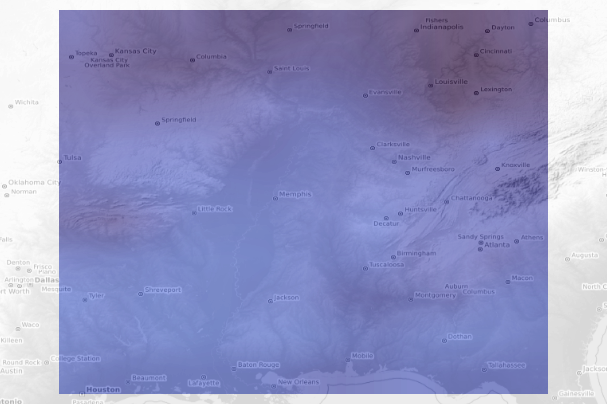

<p style="color:#515a5a; text-align:center;">GMT

<img src="gmt-geoid.png" alt="Descripción" width="500">


<p style="color:#515a5a; text-align:center;">GMT (Iluminated)

<img src="iluminate.png" alt="Descripción" width="500">

### <p style="color:#C70039; text-align:center;">References </p>


<p style="color:#515a5a;">Lowrie, W. (2007). Fundamentals of geophysics (2nd ed.). Cambridge University Press.</p>

<p style="color:#515a5a;">Fowler, C. M. R. (2005). The solid Earth: An introduction to global geophysics (2nd ed.). Cambridge University Press. 